In [0]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import io

In [2]:
#energy_data = pd.read_csv("C:/Users/udita/Documents/workspace/group3/data/Appliances Energy/energydata_complete.csv", sep=',')
#energy_data = pd.read_csv(io.StringIO(uploaded['energydata_complete.csv'].decode('utf-8')))
from google.colab import drive
drive.mount("/content/drive")
#energy_data = pd.read_csv(io.StringIO(uploaded['energydata_complete.csv'].decode('utf-8')))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
energy_data = pd.read_csv("/content/drive/My Drive/energydata_complete.csv", sep=',')
                       

In [4]:
energy_data.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
energy_data.shape


(19735, 29)

In [6]:
energy_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [0]:
energy_data = pd.DataFrame(energy_data)

In [8]:
print(energy_data.dtypes)

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object


In [9]:
energy_data.isnull().any() 

date           False
Appliances     False
lights         False
T1             False
RH_1           False
T2             False
RH_2           False
T3             False
RH_3           False
T4             False
RH_4           False
T5             False
RH_5           False
T6             False
RH_6           False
T7             False
RH_7           False
T8             False
RH_8           False
T9             False
RH_9           False
T_out          False
Press_mm_hg    False
RH_out         False
Windspeed      False
Visibility     False
Tdewpoint      False
rv1            False
rv2            False
dtype: bool

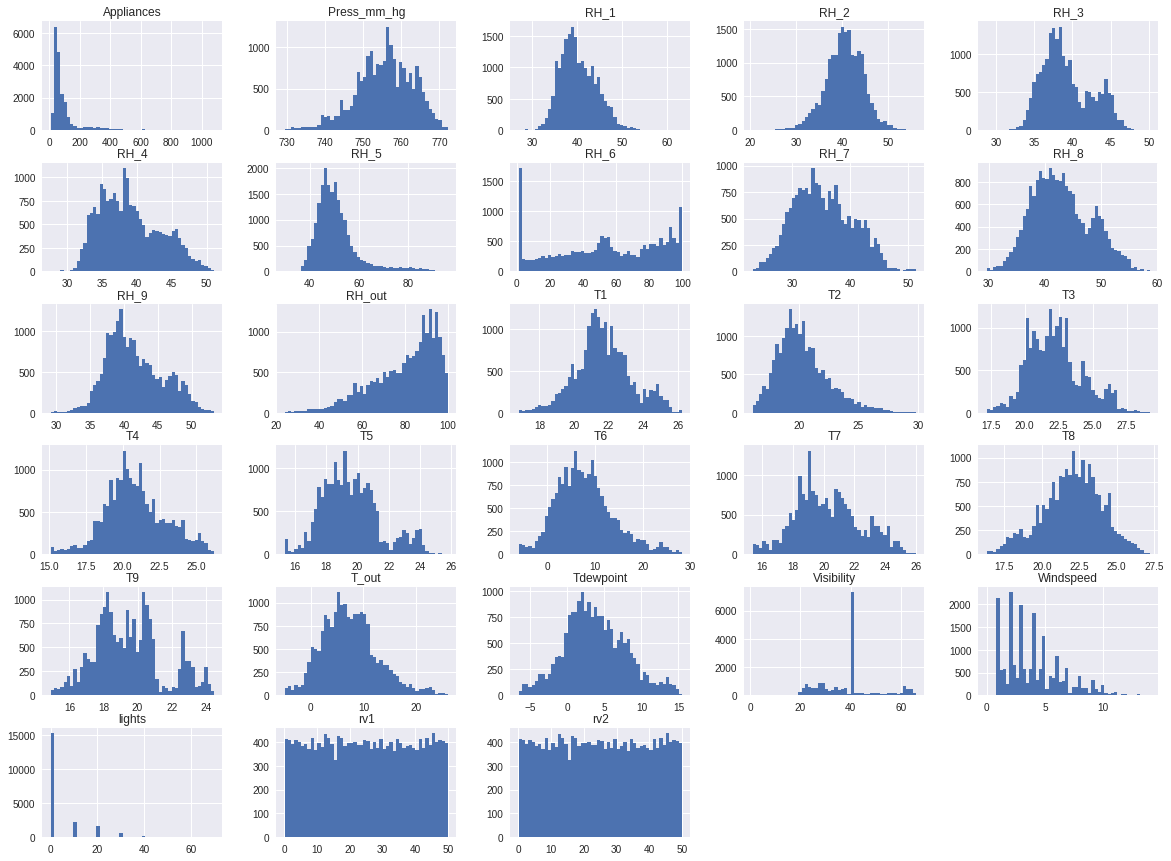

In [10]:
energy_data.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
energy_data = pd.get_dummies(energy_data)
# Display the first 5 rows of the last 12 columns
energy_data.iloc[:,5:].head(5)

,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,...,date_2016-05-27 16:30:00,date_2016-05-27 16:40:00,date_2016-05-27 16:50:00,date_2016-05-27 17:00:00,date_2016-05-27 17:10:00,date_2016-05-27 17:20:00,date_2016-05-27 17:30:00,date_2016-05-27 17:40:00,date_2016-05-27 17:50:00,date_2016-05-27 18:00:00
0,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,...,0,0,0,0,0,0,0,0,0,0
1,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,...,0,0,0,0,0,0,0,0,0,0
2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,...,0,0,0,0,0,0,0,0,0,0
3,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,...,0,0,0,0,0,0,0,0,0,0
4,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,...,0,0,0,0,0,0,0,0,0,0


In [0]:
import numpy as np
# Labels are the values we want to predict
labels = np.array(energy_data['Appliances'])
# Remove the labels from the features
# axis 1 refers to the columns
energy_data= energy_data.drop('Appliances', axis = 1)
# Saving feature names for later use
energydata_list = list(energy_data.columns)
# Convert to numpy array
energy_data = np.array(energy_data)

In [0]:
print(energydata_list)

In [0]:
train_features, test_features, train_labels, test_labels = train_test_split(energy_data, labels, test_size = 0.25, random_state = 0)

In [14]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (14801, 19762)
Training Labels Shape: (14801,)
Testing Features Shape: (4934, 19762)
Testing Labels Shape: (4934,)


In [15]:
print(len(train_features), "train +", len(test_features), "test")

14801 train + 4934 test


In [0]:
from sklearn.preprocessing import StandardScaler #feature engineering

sc = StandardScaler()  
train_features = sc.fit_transform(train_features)  
test_features = sc.transform(test_features) 

In [0]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 10,n_jobs=-1, random_state=42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [84]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'Wh')


Mean Absolute Error: 50.11 kW.


In [0]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)


In [30]:
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 38.79 %.


In [0]:
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(energydata_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

In [0]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the 19 most important features i.e. non zero importance
important_indices = [energydata_list.index('lights'), energydata_list.index('RH_out'),energydata_list.index('T3'), energydata_list.index('RH_1'),energydata_list.index('RH_8'),
                    energydata_list.index('T9'),energydata_list.index('RH_3'),energydata_list.index('T4'),energydata_list.index('T8'),energydata_list.index('T1'),energydata_list.index('T2'),
                    energydata_list.index('RH_2'),energydata_list.index('RH_4'),energydata_list.index('T5'),energydata_list.index('RH_5'),energydata_list.index('RH_6'),energydata_list.index('T7'),energydata_list.index('Press_mm_hg'),
                    energydata_list.index('Windspeed')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

In [82]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'Wh')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 35.15 degrees.
Accuracy: 66.82 %.


In [0]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 2000, random_state=42)
# Extract the four most important features
important_indices = [energydata_list.index('lights'), energydata_list.index('RH_out'),energydata_list.index('T3'), energydata_list.index('RH_1')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

In [51]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'Wh')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 59.88 degrees.
Accuracy: 32.58 %.
